<a href="https://colab.research.google.com/github/micsupasun/university_of_essex/blob/main/data_science_and_decision_making/project_agrotech/assigment_one/agrotech_project_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT FILE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
url_file_all_data = "/content/gdrive/MyDrive/essex_university/data_science_and_making_data_decition/project_agrotech/assigment_one/Data.xlsx"
with pd.ExcelFile(url_file_all_data) as reader:
  df_plant = pd.read_excel(reader, sheet_name=reader.sheet_names[0])
  df_filght_date = pd.read_excel(reader, sheet_name=reader.sheet_names[1])
  df_planting = pd.read_excel(reader, sheet_name=reader.sheet_names[2])
  df_weather = pd.read_excel(reader, sheet_name=reader.sheet_names[3])

# SURVEY DATA

In [ ]:
df_plant

# check null feature


,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208.0,2020-04-30,NaT,NaN
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208.0,2020-04-30,NaT,NaN
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208.0,2020-04-30,NaT,NaN
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208.0,2020-04-30,NaT,NaN
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208.0,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738.0,2020-08-27,4.0,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172.0,2020-10-20,NaT,NaN
4855,738.0,2020-08-27,5.0,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172.0,2020-10-20,NaT,NaN
4856,738.0,2020-08-27,3.0,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172.0,2020-10-20,NaT,NaN
4857,738.0,2020-08-27,4.0,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172.0,2020-10-20,NaT,NaN


In [ ]:
df_filght_date.head()

,Batch Number,Flight Date
0,402.0,2020-04-30
1,408.0,2020-04-30
2,409.0,2020-04-30
3,466.0,2020-07-01
4,467.0,2020-07-01


In [ ]:
df_planting.head(5)

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3.0,NaN,NaN,2020-02-06,NaN,0.0,NaN,392.0,198912.0,6.0
1,3.0,NaN,NaN,2020-02-07,NaN,0.0,NaN,503.0,63840.0,6.0
2,3.0,NaN,NaN,2020-02-07,NaN,0.0,NaN,614.0,179928.0,6.0
3,3.0,NaN,NaN,2020-02-08,NaN,0.0,NaN,725.0,200256.0,6.0
4,3.0,NaN,NaN,2020-02-10,NaN,0.0,NaN,770.0,13944.0,7.0


In [ ]:
df_weather.head()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159.0,0.0,1.4,3.3,6834.0,70.0,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280.0,0.0,0.6,2.3,6894.0,500.0,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186.0,3.4,0.8,2.7,6874.0,375.0,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221.0,0.0,1.0,3.3,6874.0,565.0,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255.0,0.0,2.1,5.5,6854.0,625.0,16.85,24.62,8.45,74.45,11.4,8.3,4.2


## find null values in all find

In [ ]:
for i in range(len(df_plant.columns)):
  print(df_plant.columns[i])
  # print(len(df_plant[features[i]].isnull()))
  print(len(df_plant[df_plant[df_plant.columns[i]].isnull()]))

Batch Number
0
Plant Date
174
Class
0
Fresh Weight (g)
1
Head Weight (g)
105
Radial Diameter (mm)
105
Polar Diameter (mm)
105
Diameter Ratio
107
Leaves
4759
Density (kg/L)
187
Leaf Area (cm^2)
2
Square ID
0
Check Date
0
Flight Date
4387
Remove
4789


## clean_planting

# Add flight dates column and planting collom in plant nan record from 2020 planting data.

In [ ]:
dict_df_planting = df_planting.set_index('Planting_Batch').to_dict()['Plant_Date']
dict_df_flight = df_filght_date.set_index('Batch Number').to_dict()['Flight Date']

for i, r in df_plant.iterrows():
  if type(r['Plant Date']) == type(pd.NaT) and r['Batch Number'] in dict_df_planting:
    df_plant.at[i,'Plant Date'] = dict_df_planting.get(r['Batch Number'])

for i, r in df_plant.iterrows():
  if type(r['Flight Date']) == type(pd.NaT) and r['Batch Number'] in dict_df_flight:
    df_plant.at[i,'Flight Date'] = dict_df_flight.get(r['Batch Number'])

# check validation

In [ ]:
df_plant[df_plant['Plant Date'].isnull()]

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove


In [ ]:
df_plant[df_plant['Flight Date'].isnull()]

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
3155,694.0,2020-08-10,4.0,103.0,8.0,50.0,42.0,1.190476,NaN,0.145513,567.0,498.0,2020-09-11,NaT,NaN
3156,694.0,2020-08-10,5.0,70.0,5.0,35.0,40.0,0.875000,NaN,0.194884,593.0,498.0,2020-09-11,NaT,NaN
3157,694.0,2020-08-10,4.0,86.0,10.0,50.0,50.0,1.000000,NaN,0.152789,494.0,498.0,2020-09-11,NaT,NaN
3158,694.0,2020-08-10,1.0,82.0,6.0,40.0,38.0,1.052632,NaN,0.188473,605.0,498.0,2020-09-11,NaT,NaN
3159,694.0,2020-08-10,1.0,93.0,9.0,50.0,52.0,0.961538,NaN,0.132221,504.0,498.0,2020-09-11,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738.0,2020-08-27,4.0,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172.0,2020-10-20,NaT,NaN
4855,738.0,2020-08-27,5.0,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172.0,2020-10-20,NaT,NaN
4856,738.0,2020-08-27,3.0,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172.0,2020-10-20,NaT,NaN
4857,738.0,2020-08-27,4.0,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172.0,2020-10-20,NaT,NaN


In [ ]:
df_plant[(df_plant['Flight Date'].isnull()) & (df_plant['Batch Number'] <= 639 )]

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove


In [ ]:
df_plant.loc[2]

Batch Number                          402.0
Plant Date              2020-04-11 00:00:00
Class                                   1.0
Fresh Weight (g)                       16.0
Head Weight (g)                         NaN
Radial Diameter (mm)                    NaN
Polar Diameter (mm)                     NaN
Diameter Ratio                          NaN
Leaves                                 12.0
Density (kg/L)                          NaN
Leaf Area (cm^2)                      137.0
Square ID                             208.0
Check Date              2020-04-30 00:00:00
Flight Date             2020-04-30 00:00:00
Remove                                  NaN
Name: 2, dtype: object

In [ ]:
df_plant.loc[3807]

Batch Number                          691.0
Plant Date              2020-08-08 00:00:00
Class                                   3.0
Fresh Weight (g)                      581.0
Head Weight (g)                       158.0
Radial Diameter (mm)                  118.0
Polar Diameter (mm)                   105.0
Diameter Ratio                      1.12381
Leaves                                  NaN
Density (kg/L)                     0.206398
Leaf Area (cm^2)                      388.0
Square ID                             283.0
Check Date              2020-09-25 00:00:00
Flight Date             2020-09-10 00:00:00
Remove                                  NaN
Name: 3807, dtype: object

# You can ignore the rows for which no plant date is available

In [ ]:
df_plant = df_plant[df_plant['Batch Number'] <= 693]
df_plant

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208.0,2020-04-30,2020-04-30,NaN
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208.0,2020-04-30,2020-04-30,NaN
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208.0,2020-04-30,2020-04-30,NaN
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208.0,2020-04-30,2020-04-30,NaN
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208.0,2020-04-30,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,693.0,2020-08-08,4.0,621.0,188.0,120.0,85.0,1.411765,NaN,0.293344,780.0,85.0,2020-09-25,2020-09-10,NaN
3841,693.0,2020-08-08,1.0,680.0,273.0,120.0,90.0,1.333333,NaN,0.402308,834.0,85.0,2020-09-25,2020-09-10,NaN
3842,693.0,2020-08-08,2.0,583.0,203.0,115.0,92.0,1.250000,NaN,0.318650,726.0,85.0,2020-09-25,2020-09-10,NaN
3843,693.0,2020-08-08,3.0,609.0,213.0,120.0,90.0,1.333333,NaN,0.313889,769.0,85.0,2020-09-25,2020-09-10,NaN


# Remove: drop the rows that are NOT blank in this column.

In [ ]:
print("before")
print(len(df_plant['Remove'].tolist()))
print(list(set(df_plant['Remove'].tolist())))
df_plant = df_plant[df_plant['Remove'] != 'r']
print("after")
print(len(df_plant['Remove'].tolist()))
print(list(set(df_plant['Remove'].tolist())))

before
3400
[nan, 'r']
after
3334
[nan]


# DELETE USELESS THE COLUMN AND CLEAN DATA

In [ ]:
del df_plant["Head Weight (g)"]
del df_plant["Diameter Ratio"]
del df_plant["Density (kg/L)"]
df_plant


,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,10.0,185.0,208.0,2020-04-30,2020-04-30,NaN
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,11.0,156.0,208.0,2020-04-30,2020-04-30,NaN
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,12.0,137.0,208.0,2020-04-30,2020-04-30,NaN
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,10.0,225.0,208.0,2020-04-30,2020-04-30,NaN
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,11.0,157.0,208.0,2020-04-30,2020-04-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3840,693.0,2020-08-08,4.0,621.0,120.0,85.0,NaN,780.0,85.0,2020-09-25,2020-09-10,NaN
3841,693.0,2020-08-08,1.0,680.0,120.0,90.0,NaN,834.0,85.0,2020-09-25,2020-09-10,NaN
3842,693.0,2020-08-08,2.0,583.0,115.0,92.0,NaN,726.0,85.0,2020-09-25,2020-09-10,NaN
3843,693.0,2020-08-08,3.0,609.0,120.0,90.0,NaN,769.0,85.0,2020-09-25,2020-09-10,NaN


# add days_to_check collum (flight_date collum -Plant Date collum)

In [ ]:
df_plant['days_to_check'] = df_plant['Flight Date'] - df_plant['Plant Date']
df_plant['days_to_check'] = list(map(lambda x: int(str(x).split(" ")[0]), df_plant['days_to_check']))

df_plant[['Flight Date','Plant Date','days_to_check']].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Flight Date,Plant Date,days_to_check
0,2020-04-30,2020-04-11,19
1,2020-04-30,2020-04-11,19
2,2020-04-30,2020-04-11,19
3,2020-04-30,2020-04-11,19
4,2020-04-30,2020-04-11,19


# drop nan 1 record column Fresh Weight (g) and Leaf Area (cm^2)

In [ ]:
df_plant[df_plant['Fresh Weight (g)'].isnull()]

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove,days_to_check
1087,511.0,2020-06-04,3.0,NaN,NaN,NaN,NaN,NaN,1496.0,2020-07-20,2020-07-15,NaN,41


In [ ]:
df_plant[df_plant['Leaf Area (cm^2)'].isnull()]

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove,days_to_check
1087,511.0,2020-06-04,3.0,NaN,NaN,NaN,NaN,NaN,1496.0,2020-07-20,2020-07-15,NaN,41


In [ ]:
df_plant = df_plant[df_plant['Leaf Area (cm^2)'].notnull()]
df_plant

,Batch Number,Plant Date,Class,Fresh Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove,days_to_check
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,10.0,185.0,208.0,2020-04-30,2020-04-30,NaN,19
1,402.0,2020-04-11,4.0,15.0,NaN,NaN,11.0,156.0,208.0,2020-04-30,2020-04-30,NaN,19
2,402.0,2020-04-11,1.0,16.0,NaN,NaN,12.0,137.0,208.0,2020-04-30,2020-04-30,NaN,19
3,402.0,2020-04-11,3.0,15.0,NaN,NaN,10.0,225.0,208.0,2020-04-30,2020-04-30,NaN,19
4,402.0,2020-04-11,3.0,15.0,NaN,NaN,11.0,157.0,208.0,2020-04-30,2020-04-30,NaN,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,693.0,2020-08-08,4.0,621.0,120.0,85.0,NaN,780.0,85.0,2020-09-25,2020-09-10,NaN,33
3841,693.0,2020-08-08,1.0,680.0,120.0,90.0,NaN,834.0,85.0,2020-09-25,2020-09-10,NaN,33
3842,693.0,2020-08-08,2.0,583.0,115.0,92.0,NaN,726.0,85.0,2020-09-25,2020-09-10,NaN,33
3843,693.0,2020-08-08,3.0,609.0,120.0,90.0,NaN,769.0,85.0,2020-09-25,2020-09-10,NaN,33


# DATASET DONE!!!!

In [ ]:
# not_use_leaves because record 90% is nan record drop is better
features = ["Batch Number","Class","Fresh Weight (g)","Leaf Area (cm^2)","Square ID","days_to_check"]
df = df_plant[features]
# 
# Check Date

In [ ]:
df.dtypes

Batch Number        float64
Class               float64
Fresh Weight (g)    float64
Leaf Area (cm^2)    float64
Square ID           float64
days_to_check         int64
dtype: object

In [ ]:
df.head(5)

,Batch Number,Class,Fresh Weight (g),Leaf Area (cm^2),Square ID,days_to_check
0,402.0,3.0,15.0,185.0,208.0,19
1,402.0,4.0,15.0,156.0,208.0,19
2,402.0,1.0,16.0,137.0,208.0,19
3,402.0,3.0,15.0,225.0,208.0,19
4,402.0,3.0,15.0,157.0,208.0,19


In [ ]:
# check null feature
for i in range(len(features)):
  print(features[i])
  # print(len(df_plant[features[i]].isnull()))
  print(len(df_plant[df_plant[features[i]].isnull()]))

Batch Number
0
Class
0
Fresh Weight (g)
0
Leaf Area (cm^2)
0
Square ID
0
days_to_check
0


# SPLIT FEATURE AND LABEL

In [ ]:
import numpy as np
# FEATURE
X = df.loc[:, df.columns != 'days_to_check'].to_numpy()
# LABEL
y = df.loc[:, 'days_to_check'].to_numpy()
print(X,y)
print(X.shape, y.shape)

[[402.   3.  15. 185. 208.]
 [402.   4.  15. 156. 208.]
 [402.   1.  16. 137. 208.]
 ...
 [693.   2. 583. 726.  85.]
 [693.   3. 609. 769.  85.]
 [693.   3. 709. 802.  85.]] [19 19 19 ... 33 33 33]
(3333, 5) (3333,)


# PREPARERING DATA WITH TRAIN TEST SPRIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the Algorithm Model

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

19.621515685755263


In [ ]:
print(regressor.coef_)

[ 0.01600854 -0.05195272  0.00938151 -0.00021843 -0.00449578]


# Predictions

# PREDICT ONE DATA

In [ ]:
import datetime
from datetime import date, timedelta
def predict_flight_date(var_batch_number,var_class,var_fresh_weight,var_leaf_area,var_square_id,var_plant_date):
  np_description = np.array([[var_batch_number, var_class, var_fresh_weight, var_leaf_area, var_square_id]])
  predict_duration = int(regressor.predict(np_description)[0])
  day_plant_date = int(var_plant_date.split("/")[1])
  month_plant_date = int(var_plant_date.split("/")[0])
  year_plant_date = int(var_plant_date.split("/")[2])
  plant_date_time_stamp = datetime.datetime(year_plant_date, month_plant_date, day_plant_date)
  for i in range(predict_duration+1):
    var_flight_date = plant_date_time_stamp + timedelta(days=i)
  return var_flight_date
a = predict_flight_date(477,3,320,303,514,"5/22/2020")
print(a)


2020-06-18 00:00:00


# PREDICT ALL RECORD

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
0,32,36.588967
1,43,34.817928
2,33,32.419567
3,15,20.532060
4,17,31.662319
...,...,...
662,34,32.516681
663,34,36.984972
664,35,29.015256
665,33,36.226726


# METRICS

In [ ]:
# regresstion use this!!!!!!
# MSE, MAE, R-squared, Adjusted R-squared, and RMSE
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('adjusted R-squared:', 1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('R-squared:',r2_score(y_test, y_pred))


Mean Absolute Error: 5.871361277733513
Mean Squared Error: 64.14748476755241
Root Mean Squared Error: 8.009212493594637
adjusted R-squared: 0.1764682852393129
R-squared: 0.15798276510376819


In [ ]:
# You can't use classification metric with a regression. 

## DATA VIRTUALIZATION FALSE PREDICTOR

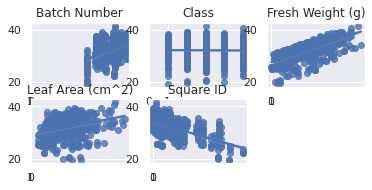

In [ ]:
import seaborn as sns; 
sns.set_theme(color_codes=True)
for i in range(X_test.shape[1]):
  plt.subplot(3, 3, i+1)
  ax = sns.regplot(x=X_test[:,i], y=y_pred, data=df_predict)
  plt.xticks([0, 1])
  plt.title(df.columns[i])